# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The **No-show appointments** dataset originally came from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). The dataset collected information from 100k medical appointments to track whether or not patients arrived for their appointments. The dataset includes the following column information.

| Column | Significance | Data Type |
|---|---|---|
| patient_id | A number to uniquely identify patients | float64 |
| appointment_id | A number to uniquely identify appointments | int64 |
| gender  | A value containing 'F' or 'M' | object |
| scheduled_day  | A string representing the date an appointment was scheduled | object |
| appointment_day  | A string representing the date an appointment ocurred | object |
| age | The age of the patient at the time of the appointment | int64 |
| neighbourhood | A string representing the date an appointment would occur | object |
| scholarship | A Boolean value to indicate if the patient is enrolled in Brazilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). | int64 |
| hypertension | A Boolean value to indicate if the patient has hypertension | int64 |
| diabetes | A Boolean value to indicate if the patient has diabetes | int64 |
| alcoholism | A Boolean value to indicate if the patient has alcoholism | int64 |
| handicap | A Boolean value to indicate if the patient has any disabilities | int64 |
| sms_received | A number to show the number of SMS messages the patient received| int64 |
| no_show  | An inverted Boolean value to indicate if a patient attended their appointments stored as a 'Yes' or 'No' string (no indicates the patient attended their appointment)| object |



### Question(s) for Analysis
The three questions being explored are as follows:
1. Which neighborhoods have the poorest appointment attendance?
2. How does wait time impact appointment attendance?
3. Does having a scholarship have any impact on patient attendance?

In [119]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling
### General Properties
* The dataset has 110527 observations in 14 columns. Of these rows, only the `AppointmentID` column has completely unique values.
* None of the columns are missing data.
* Although there are 110527 observations, there are only 62299 patients. Some of the patients had multiple appointments.
* `Handcap` is supposed to be a Boolean value, however, there are 5 different observations. This suggests that some of the responses are invalid.
* The mean `Age` and the median `Age` are very close. That means that the impact of outliers on the dataset is likely minimal for this value. However, the minimum and maximum age ranges appear to be invalid at `-1` and `115` respectively.
* Patients are from 81 different neighborhoods.
* While patients made appointments on 103549 different days, those appointments only occurred on 27 different dates.
* A number of boolean columns only have two values, however, those values are stored as strings and numbers rather than booleans.

In [120]:
# first few rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [121]:
# Numbers of columns, rows, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [122]:
# show how many unique values are in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [123]:
# show summary statistics for numeric columns
df.describe(include='number')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [124]:
# verify only 'F' or 'M' values
df['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [125]:
# check for boolean values only
df['Scholarship'].value_counts()

Scholarship
0    99666
1    10861
Name: count, dtype: int64

In [126]:
# check for boolean values only
df['Diabetes'].value_counts()

Diabetes
0    102584
1      7943
Name: count, dtype: int64

In [127]:
# check for boolean values only
df['Alcoholism'].value_counts()

Alcoholism
0    107167
1      3360
Name: count, dtype: int64

In [128]:
# check for boolean values only
df['Handcap'].value_counts()


Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [129]:
# check for boolean values only
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [130]:
# verify valid ages
print('Max Age', df['Age'].max())
print('Min Age', df['Age'].min())

Max Age 115
Min Age -1


In [131]:
# checking for empty or whitespace-only strings
empty_gender = df['Gender'].str.strip().eq('').sum()
empty_scheduled = df['ScheduledDay'].str.strip().eq('').sum()
empty_appt = df['AppointmentDay'].str.strip().eq('').sum()
empty_neighbor = df['Neighbourhood'].str.strip().eq('').sum()
empty_no_show = df['No-show'].str.strip().eq('').sum()

print('Empty gender:', empty_gender)
print('Empty scheduled day:', empty_scheduled)
print('Empty appointment day:', empty_appt)
print('Empty neighbourhood:', empty_neighbor)
print('Empty no-show:', empty_no_show)

Empty gender: 0
Empty scheduled day: 0
Empty appointment day: 0
Empty neighbourhood: 0
Empty no-show: 0



### Data Cleaning

#### Cleaning Plan
##### Column Names
* The `PatientId` and `AppointmentID` columns should probably be consistent, either both ans `Id` or `ID`
* The `Hipertension` and `Handcap` columns will be converted to Americanized spellings
* Everything will be converted to snake-case to match Python's standard naming convention

##### Incorrect data types
* Boolean columns should be converted to boolean values (`Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `No-show`.
* `ScheduledDay` and `AppointmentDay` columns should be stored as dates
  
##### Invalid data
* An internet search has revealed the oldest living person in Brazil passed away at the age of `116` so the `max` `Age` will remain. The `min` `Age` will be replaced with 0.
* Any `Handcap` that is not 1 or 0 will be converted to 1.

##### Missing Data
The dataset appears complete. There are no `null` or `NaN` values in the number fields. There are no empty strings in the string fields.

##### Duplicate values
The only field where duplicates would be problematic is the `AppointmentID` column. It's fine for the other fields to have duplicate values.


In [132]:
# Renaming columns

# print current column names
print('Dirty column names:', df.columns)

# create dictionary to map new names
new_names = {
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    'Gender': 'gender',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Age': 'age',
    'Neighbourhood': 'neighborhood',
    'Scholarship': 'scholarship',
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    'SMS_received': 'sms_received',
    'No-show': 'no_show'
}

# rename columns
df = df.rename(columns=new_names)

# print current column names
print('Clean column names:', df.columns)



Dirty column names: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
Clean column names: Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')


In [133]:
# Ensure handicap values are 0 or 1
for index, value in df['handicap'].items():
    if value != 0:
        df.loc[index, 'handicap'] = 1

# ensure boolean values
df['handicap'].value_counts()


handicap
0    108286
1      2241
Name: count, dtype: int64

In [134]:
# Invert logic so True = patient showed up
df['no_show'] = df['no_show'].map({'No': 1, 'Yes': 0}).astype(bool)

# Verify
print(df['no_show'].value_counts())
print(df['no_show'].dtypes)


no_show
True     88208
False    22319
Name: count, dtype: int64
bool


In [135]:
# Function for boolean conversions
def convert_to_bool(num):
    if num == 0:
        return False
    return True

In [136]:
# convert values to booleans
df['scholarship'] = df['scholarship'].apply(convert_to_bool)
df['hypertension'] = df['hypertension'].apply(convert_to_bool)
df['diabetes'] = df['diabetes'].apply(convert_to_bool)
df['alcoholism'] = df['alcoholism'].apply(convert_to_bool)
df['handicap'] = df['handicap'].apply(convert_to_bool)

# verify data types
print('Data types')
print('Scholarship:', df['scholarship'].dtypes)
print('Hypertension:', df['hypertension'].dtypes)
print('Diabetes:', df['diabetes'].dtypes)
print('Alcoholism:', df['alcoholism'].dtypes)
print('Handicap:', df['handicap'].dtypes)
print('No-show:', df['no_show'].dtypes)

# verify values
print('\nUnique values after conversion:')
print('Scholarship:', df['scholarship'].unique())
print('Hypertension:', df['hypertension'].unique())
print('Diabetes:', df['diabetes'].unique())
print('Alcoholism:', df['alcoholism'].unique())
print('Handicap:', df['handicap'].unique())
print('No-show:', df['no_show'].unique())


Data types
Scholarship: bool
Hypertension: bool
Diabetes: bool
Alcoholism: bool
Handicap: bool
No-show: bool

Unique values after conversion:
Scholarship: [False  True]
Hypertension: [ True False]
Diabetes: [False  True]
Alcoholism: [False  True]
Handicap: [False  True]
No-show: [ True False]


In [137]:
# View current dataset state
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighborhood     110527 non-null  object 
 7   scholarship      110527 non-null  bool   
 8   hypertension     110527 non-null  bool   
 9   diabetes         110527 non-null  bool   
 10  alcoholism       110527 non-null  bool   
 11  handicap         110527 non-null  bool   
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  bool   
dtypes: bool(6), float64(1), int64(3), object(4)
memory usage: 7.4+ MB


In [138]:
# convert strings to dates
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

#sanity checks
print('Data types')
print('Scheduled day:', df['scheduled_day'].dtypes)
print('Appointment day:', df['appointment_day'].dtypes)


Data types
Scheduled day: datetime64[ns, UTC]
Appointment day: datetime64[ns, UTC]


In [139]:
# Remove invalid age
df['age'] = df['age'].replace(-1, 0)

#sanity check
df['age'].min()

0

In [140]:
# Final validation checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighborhood     110527 non-null  object             
 7   scholarship      110527 non-null  bool               
 8   hypertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handicap         110527 non-null  bool               
 12  sms_received     110527 non-null  int64              
 13 

In [141]:
df.describe()

,patient_id,appointment_id,age,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which neighborhoods have the poorest appointment attendance?

In [142]:
# group attendance by neighborhood and count
attendance_counts = df.groupby('neighborhood')['no_show'].value_counts().unstack(fill_value=0)

# Get missed appointments
missed = attendance_counts[True]

missed_sorted = missed.sort_values(ascending=False)

top_five = missed_sorted.head(5)

print(top_five)

neighborhood
JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: True, dtype: int64


In [143]:
# Overall Missed appointment Averages
missed.describe()

count      81.000000
mean     1088.987654
std      1096.260581
min         0.000000
25%       321.000000
50%       709.000000
75%      1562.000000
max      6252.000000
Name: True, dtype: float64

In [144]:
# top 5 appointment count
top_five.describe()

count       5.000000
mean     4048.800000
std      1419.538552
min      2635.000000
25%      3246.000000
50%      3525.000000
75%      4586.000000
max      6252.000000
Name: True, dtype: float64

In [145]:
# Attendance as a proportion of population

# Find total number of appointments in each neighborhood
total_appt = df.groupby('neighborhood')['no_show'].count()

# Find proportion of no_shows
attendance_rate = (missed / total_appt) * 100

attendance_sorted = attendance_rate.sort_values(ascending=False)

percent_top_five = attendance_sorted.head()

print(percent_top_five)

neighborhood
PARQUE INDUSTRIAL    100.000000
ILHA DO BOI           91.428571
AEROPORTO             87.500000
MÁRIO CYPRESTE        85.444744
SOLON BORGES          85.287846
dtype: float64


In [146]:
# Percentage summaries
attendance_sorted.describe()

count     81.000000
mean      79.457332
std        9.722959
min        0.000000
25%       78.254649
50%       80.241151
75%       82.009346
max      100.000000
dtype: float64

In [147]:
# worst by percentage summaries
percent_top_five.describe()

count      5.000000
mean      89.932232
std        6.148630
min       85.287846
25%       85.444744
50%       87.500000
75%       91.428571
max      100.000000
dtype: float64

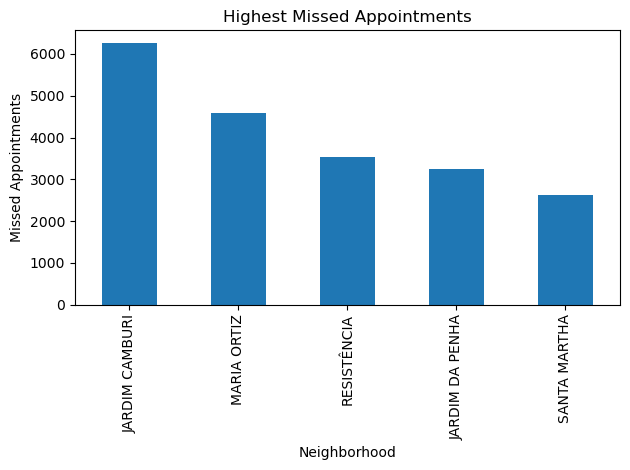

In [148]:
# view results
top_five.plot(kind="bar", title="Highest Missed Appointments")
plt.xlabel("Neighborhood")
plt.ylabel("Missed Appointments")
plt.tight_layout()
plt.show()


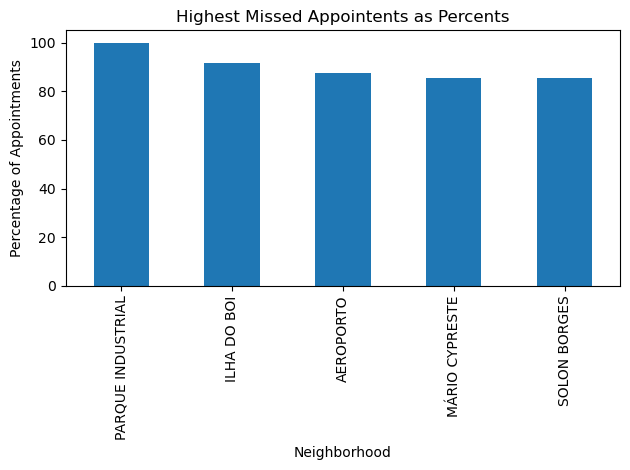

In [149]:
# view results
percent_top_five.plot(kind="bar", title="Highest Missed Appointents as Percents")
plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Appointments")
plt.tight_layout()
plt.show()

### 2. How does wait time impact appointment attendance?

In [150]:
# copy dataset
wt_df = df.copy()

# # add wait times to data set
wt_df['wait_time'] = (wt_df['appointment_day'] - wt_df['scheduled_day']).dt.days

wt_df['wait_time'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: wait_time, dtype: float64

In [151]:
# assume negative wait times are recorded incorrectly
def invert_wait_times(scheduled_day, appointment_day):
    temp_wait = ''

    if scheduled_day > appointment_day:
        temp_wait = appointment_day
        appointment_day = scheduled_day
        scheduled_day = temp_wait
    
    return scheduled_day, appointment_day

# Apply function row-by-row
wt_df[['scheduled_day', 'appointment_day']] = wt_df.apply(
    lambda row: invert_wait_times(row['scheduled_day'], row['appointment_day']),
    axis=1, result_type='expand'
)

In [152]:
# recalculate wait times
wt_df['wait_time'] = (wt_df['appointment_day'] - wt_df['scheduled_day']).dt.days

# check for corrected wait times
wt_df['wait_time'].describe()

count    110527.000000
mean          9.532829
std          15.027683
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: wait_time, dtype: float64

In [153]:
# separate data by attendance
attended_appt = wt_df[wt_df['no_show'] == False]
missed_appt = wt_df[wt_df['no_show'] == True]

print("Attended appointment:", attended_appt['wait_time'].mean())
print("Missed appointent:", missed_appt['wait_time'].mean())

Attended appointment: 14.912899323446391
Missed appointent: 8.171526392163976


C:\Users\shari\AppData\Local\Temp\ipykernel_27756\1143929060.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


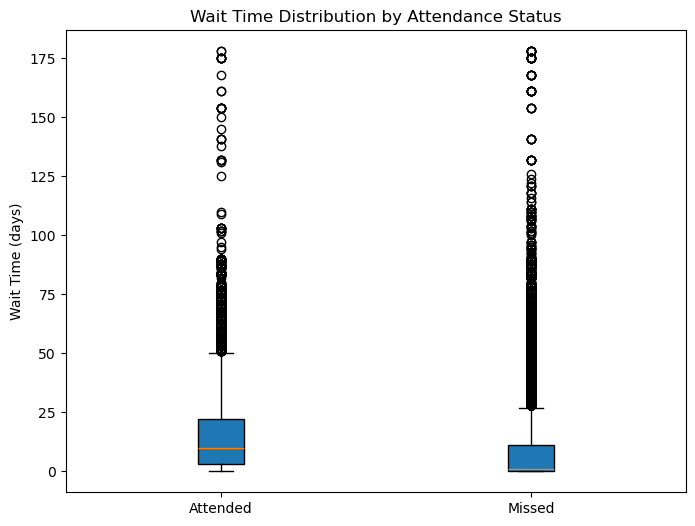

In [154]:
# plot results

# Create a box plot comparing wait times for attended vs missed appointments
plt.figure(figsize=(8, 6))
plt.boxplot(
    [attended_appt['wait_time'], missed_appt['wait_time']],
    labels=['Attended', 'Missed'],
    patch_artist=True
)

plt.title('Wait Time Distribution by Attendance Status')
plt.ylabel('Wait Time (days)')
plt.show()


C:\Users\shari\AppData\Local\Temp\ipykernel_27756\494959986.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


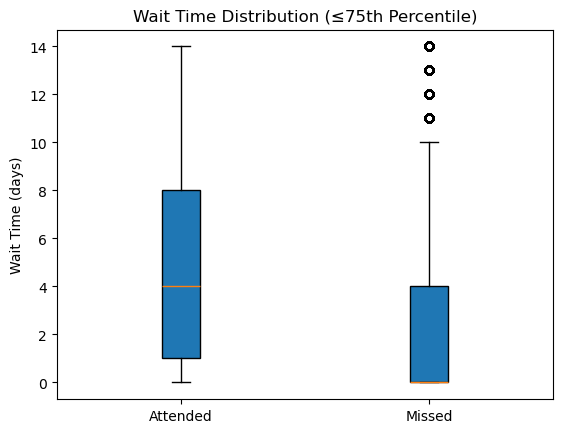

In [155]:
# reduce outliers to make graph clearer
q75 = wt_df['wait_time'].quantile(0.75)
filtered_df = wt_df[wt_df['wait_time'] <= q75]

attended_filtered = filtered_df[filtered_df['no_show'] == False]
missed_filtered = filtered_df[filtered_df['no_show'] == True]

plt.boxplot(
    [attended_filtered['wait_time'], missed_filtered['wait_time']],
    labels=['Attended', 'Missed'],
    patch_artist=True
)
plt.title('Wait Time Distribution (≤75th Percentile)')
plt.ylabel('Wait Time (days)')
plt.show()


### 3. Does having a scholarship have any impact on patient attendance?

In [156]:
# Filter for patients with scholarships
# groups
schol_patients = df[df['scholarship'] == True]
no_schol_patients = df[df['scholarship'] == False]

# proportions missed
schol_percent = (schol_patients['no_show'] == True).mean()
no_schol_percent = (no_schol_patients['no_show'] == True).mean()

print("Avg scholarship: ", schol_percent * 100)
print("Avg total: ", no_schol_percent * 100)


Avg scholarship:  76.26369579228432
Avg total:  80.19284409929163


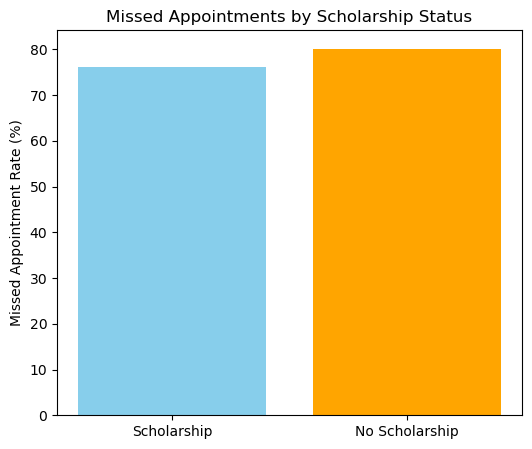

In [157]:
# visualization

plt.figure(figsize=(6, 5))
plt.bar(['Scholarship', 'No Scholarship'],
        [schol_percent * 100, no_schol_percent * 100],
        color=['skyblue', 'orange'])
plt.ylabel('Missed Appointment Rate (%)')
plt.title('Missed Appointments by Scholarship Status')
plt.show()

<a id='conclusions'></a>
## Conclusions

The analysis explored three questions related to appointment attendance among patients:

1. Which neighborhoods have the poorest appointment attendance?
2. How does wait time impact attendance?
3. Does having a scholarship influence whether a patient attends their appointment?

Neighborhoods such as **Jardim Camburi** and **Maria Ortiz** had the highest *number* of missed appointments overall. However, when comparing the *percentage* of missed appointments relative to total appointments, neighborhoods such as **Parque Industrial** and **Ilha do Boi** had the poorest attendance rates. This distinction suggests that there may be additional factors that impact patient attendance related to neighborhood.

Analysis of **wait times** revealed that patients with **longer wait times were more likely to attend** their appointments. On average, patients who attended waited about **15 days**, while those who missed waited about **8 days**. Although this finding was unexpected, it may suggest that patients with longer waits plan more carefully or that certain types of appointments require longer lead times.

Finally, analysis of **scholarship status** indicated that patients with scholarships were **slightly more likely to miss** their appointments compared to those without. This difference was small and may not indicate a meaningful relationship, but it suggests that **financial assistance alone does not ensure attendance**.

### Limitations

One key limitation of this analysis is the lack of contextual data about each patient. Factors such as distance from the clinic, health severity, employment obligations, or transportation access were not available but may strongly influence attendance. In addition, this project used **descriptive statistics only**. No inferential statistical tests were conducted, so the results describe associations rather than causation.

### Recommendations

Future research could include a more detailed analysis of socioeconomic factors or time-of-day patterns in attendance. It may also be valuable to analyze appointment types to determine whether certain specialties or procedures experience higher no-show rates.

In [159]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 534887 bytes to Investigate_a_Dataset.html
